# Understand the Dataset  

In [3]:
# type: ignore
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify

import warnings
warnings.filterwarnings('ignore')

In [4]:
source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\Laptop Price Data Analysis\laptop_price - dataset.csv'
df = pd.read_csv(source, encoding= 'unicode_escape')
df.sample(7)


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
1144,HP,Spectre Pro,2 in 1 Convertible,13.3,Touchscreen 2560x1440,Intel,Core i7 6600U,2.6,8,256GB SSD,Intel,HD Graphics 520,Windows 10,1.48,1799.00
1074,Lenovo,ThinkPad Yoga,Ultrabook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,8,256GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1713.49
1205,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,AMD,Radeon R7 M445,Windows 10,2.36,889.00
228,Asus,K756UX-T4340T (i5-7200U/8GB/500GB,Notebook,17.3,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD + 500GB HDD,Nvidia,GeForce GTX 950M,Windows 10,2.69,891.00
298,Lenovo,IdeaPad 310-15ABR,Notebook,15.6,Full HD 1920x1080,AMD,A10-Series 9600P,2.4,6,1TB HDD,AMD,Radeon R5 430,Windows 10,2.40,499.00
807,HP,15-ba043na (A12-9700P/8GB/2TB/W10),Notebook,15.6,1366x768,AMD,A12-Series 9700P,2.5,8,2TB HDD,AMD,Radeon R7 Graphics,Windows 10,2.04,629.00
555,Asus,A541NA-GO342 (N3350/4GB/500GB/Linux),Notebook,15.6,1366x768,Intel,Celeron Dual Core N3350,1.1,4,500GB HDD,Intel,HD Graphics 500,Linux,2.00,224.00


In [5]:
df.size

19125

In [6]:
df.shape

(1275, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1275,19,Dell,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,1275,618,XPS 13,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeName,1275,6,Notebook,707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inches,1275.0,NaN,NaN,NaN,15.022902,1.42947,10.1,14.0,15.6,15.6,18.4
ScreenResolution,1275,40,Full HD 1920x1080,505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPU_Company,1275,3,Intel,1214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPU_Type,1275,93,Core i5 7200U,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPU_Frequency (GHz),1275.0,NaN,NaN,NaN,2.30298,0.503846,0.9,2.0,2.5,2.7,3.6
RAM (GB),1275.0,NaN,NaN,NaN,8.440784,5.097809,2.0,4.0,8.0,8.0,64.0
Memory,1275,39,256GB SSD,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

Here are the columns in your dataset:

1. **Company**: The manufacturer of the laptop.
2. **Product**: The specific model or product name.
3. **TypeName**: The type or category of the laptop (e.g., Ultrabook, Notebook).
4. **Inches**: Screen size in inches.
5. **ScreenResolution**: The resolution of the screen.
6. **CPU_Company**: The manufacturer of the CPU (e.g., Intel, AMD).
7. **CPU_Type**: The specific type of CPU.
8. **CPU_Frequency (GHz)**: The CPU frequency in GHz.
9. **RAM (GB)**: The amount of RAM in gigabytes.
10. **Memory**: The storage information (SSD/HDD and capacity).
11. **GPU_Company**: The manufacturer of the GPU (e.g., NVIDIA, AMD).
12. **GPU_Type**: The specific type of GPU.
13. **OpSys**: The operating system installed on the laptop.
14. **Weight (kg)**: The weight of the laptop in kilograms.
15. **Price (Euro)**: The price of the laptop in euros.

In [10]:
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
554,HP,ProBook 470,Notebook,17.3,Full HD 1920x1080,Intel,Core i7 7500U,2.7,8,1TB HDD,Nvidia,GeForce 930MX,Windows 10,2.63,1280.0
1042,Toshiba,Tecra A50-C-218,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel,Core i7 6500U,2.5,16,256GB SSD,Nvidia,GeForce 930M,Windows 10,2.40,1425.0
429,Mediacom,FlexBook Edge,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Celeron Dual Core N3350,1.1,4,32GB SSD,Intel,HD Graphics 500,Windows 10,1.16,299.0


# Data Cleaning 

<Axes: >

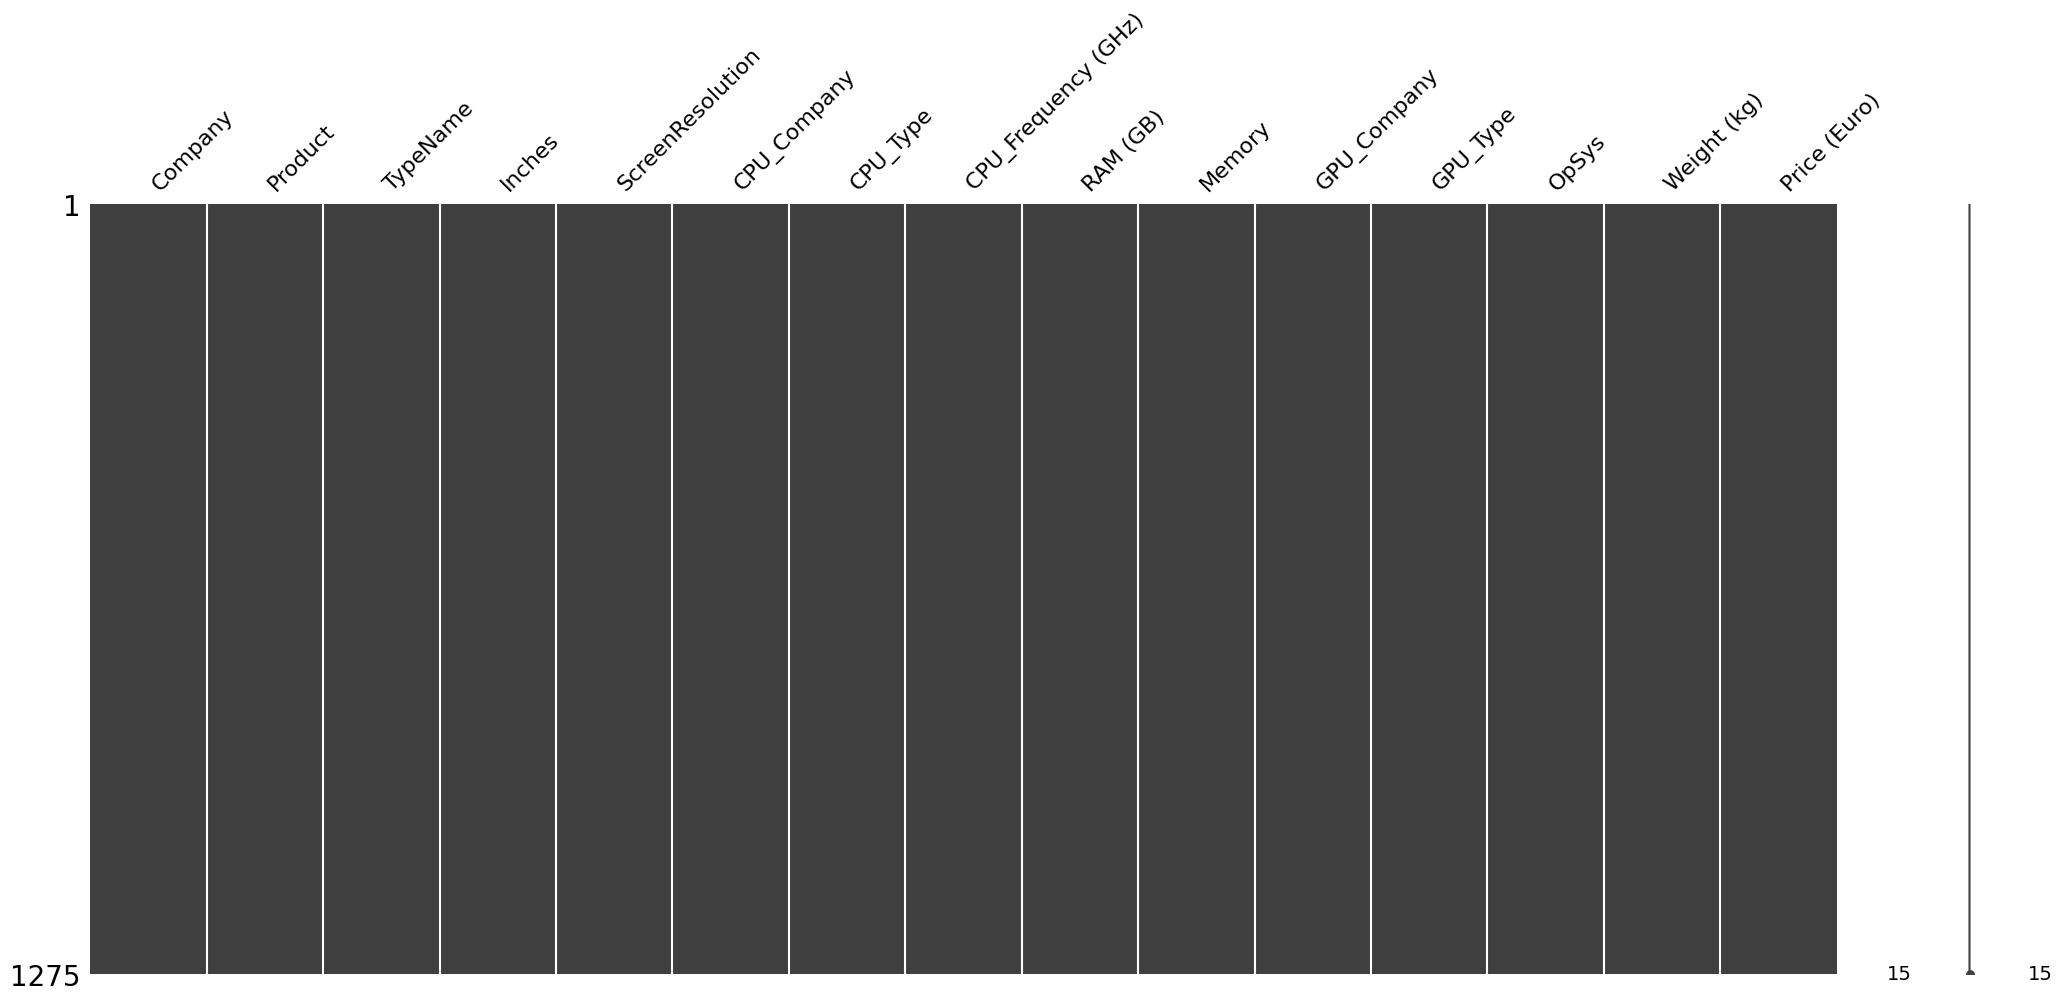

In [11]:
msno.matrix(df)

In [12]:
# Change the name of column for convince

df.rename(columns={'CPU_Frequency (GHz)':'CPU_Freq',
                   'RAM (GB)':'RAM',
                   'Weight (kg)':'Weight',
                   'Price (Euro)':'Price'}, inplace=True)

# Analysis

## 1. Price Analysis and Trends

### 1.1 Price vs. Specifications
- Objective: Understand how different specifications affect laptop prices.
- Perform regression analysis to examine the impact of features like CPU, RAM, and GPU on price.


In [13]:
#type name 
k = df.groupby(['TypeName'], as_index=False)['Price'].sum() 
k

,TypeName,Price
0,2 in 1 Convertible,150896.60
1,Gaming,354933.03
2,Netbook,15487.80
3,Notebook,557642.56
4,Ultrabook,301995.15
5,Workstation,66130.41


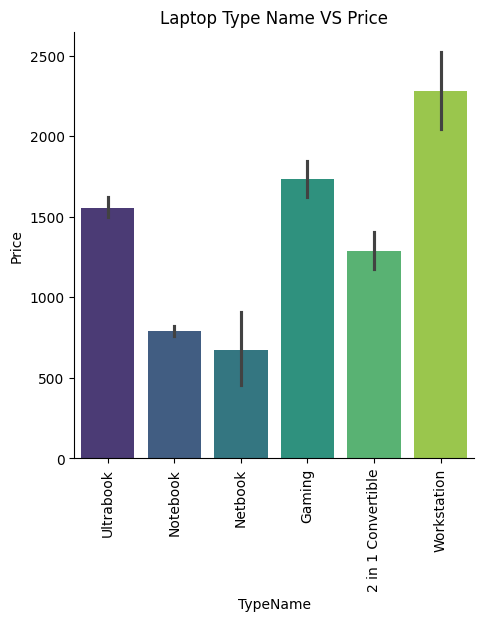

In [14]:
# laptop type name
sns.catplot(
    data=df,
    kind='bar',
    x=df['TypeName'],
    y=df['Price'],
    palette='viridis'
)

plt.title('Laptop Type Name VS Price')
plt.xticks(rotation=90)
plt.show()

In [15]:
# cpu type table
temp_sorted =  df.groupby(['CPU_Type'], as_index=False)['Price'].sum() \
    .sort_values(by='Price', ascending=True).reset_index(drop=True)
temp_sorted.tail(18)


,CPU_Type,Price
75,Core i7 6820HQ,16434.00
76,Core i5,16703.38
77,Core i5 7300U,17623.91
78,Core i3 7100U,20986.57
79,Core i7 7600U,24904.24
80,Core i7 6820HK,25557.63
81,Core i7 7820HK,26828.75
82,Core i7 6600U,34771.35
83,Core i5 7300HQ,36093.07
84,Core i3 6006U,39901.32


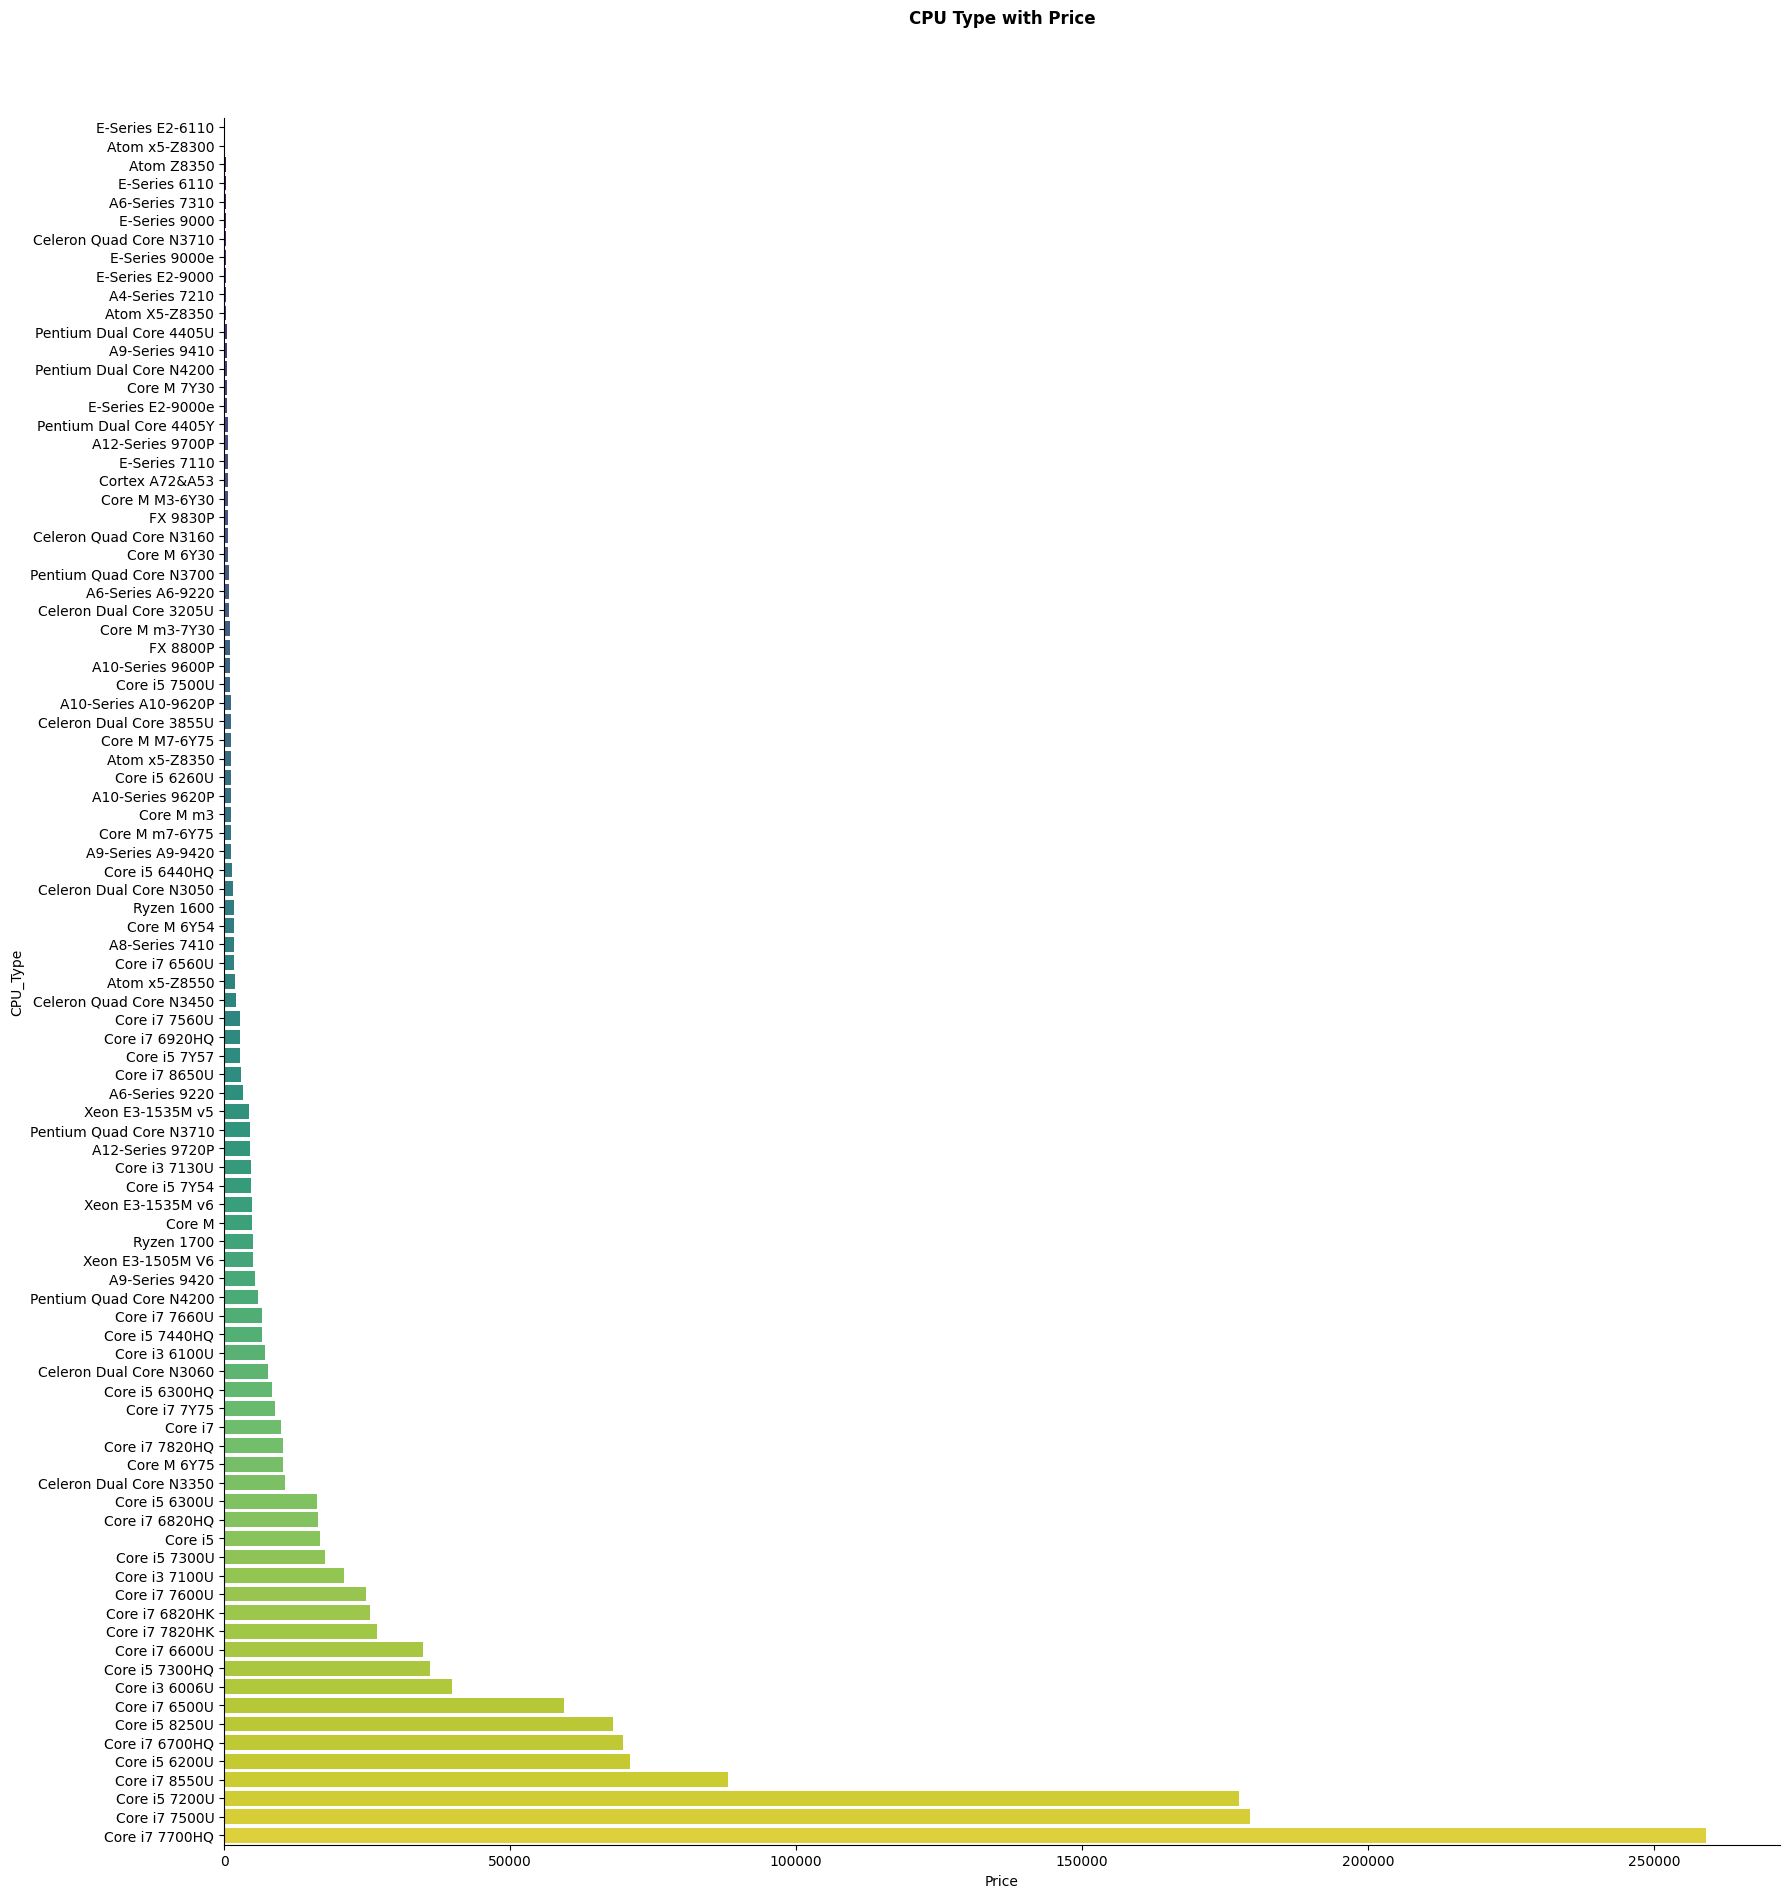

In [16]:
# cpu type
sns.catplot(
    data=temp_sorted,
    kind='bar',
    x='Price',
    y='CPU_Type',
    height=18,
    palette='viridis', 
)

plt.title('CPU Type with Price', y=1.05, fontdict={'fontweight': 'bold'})
plt.show()

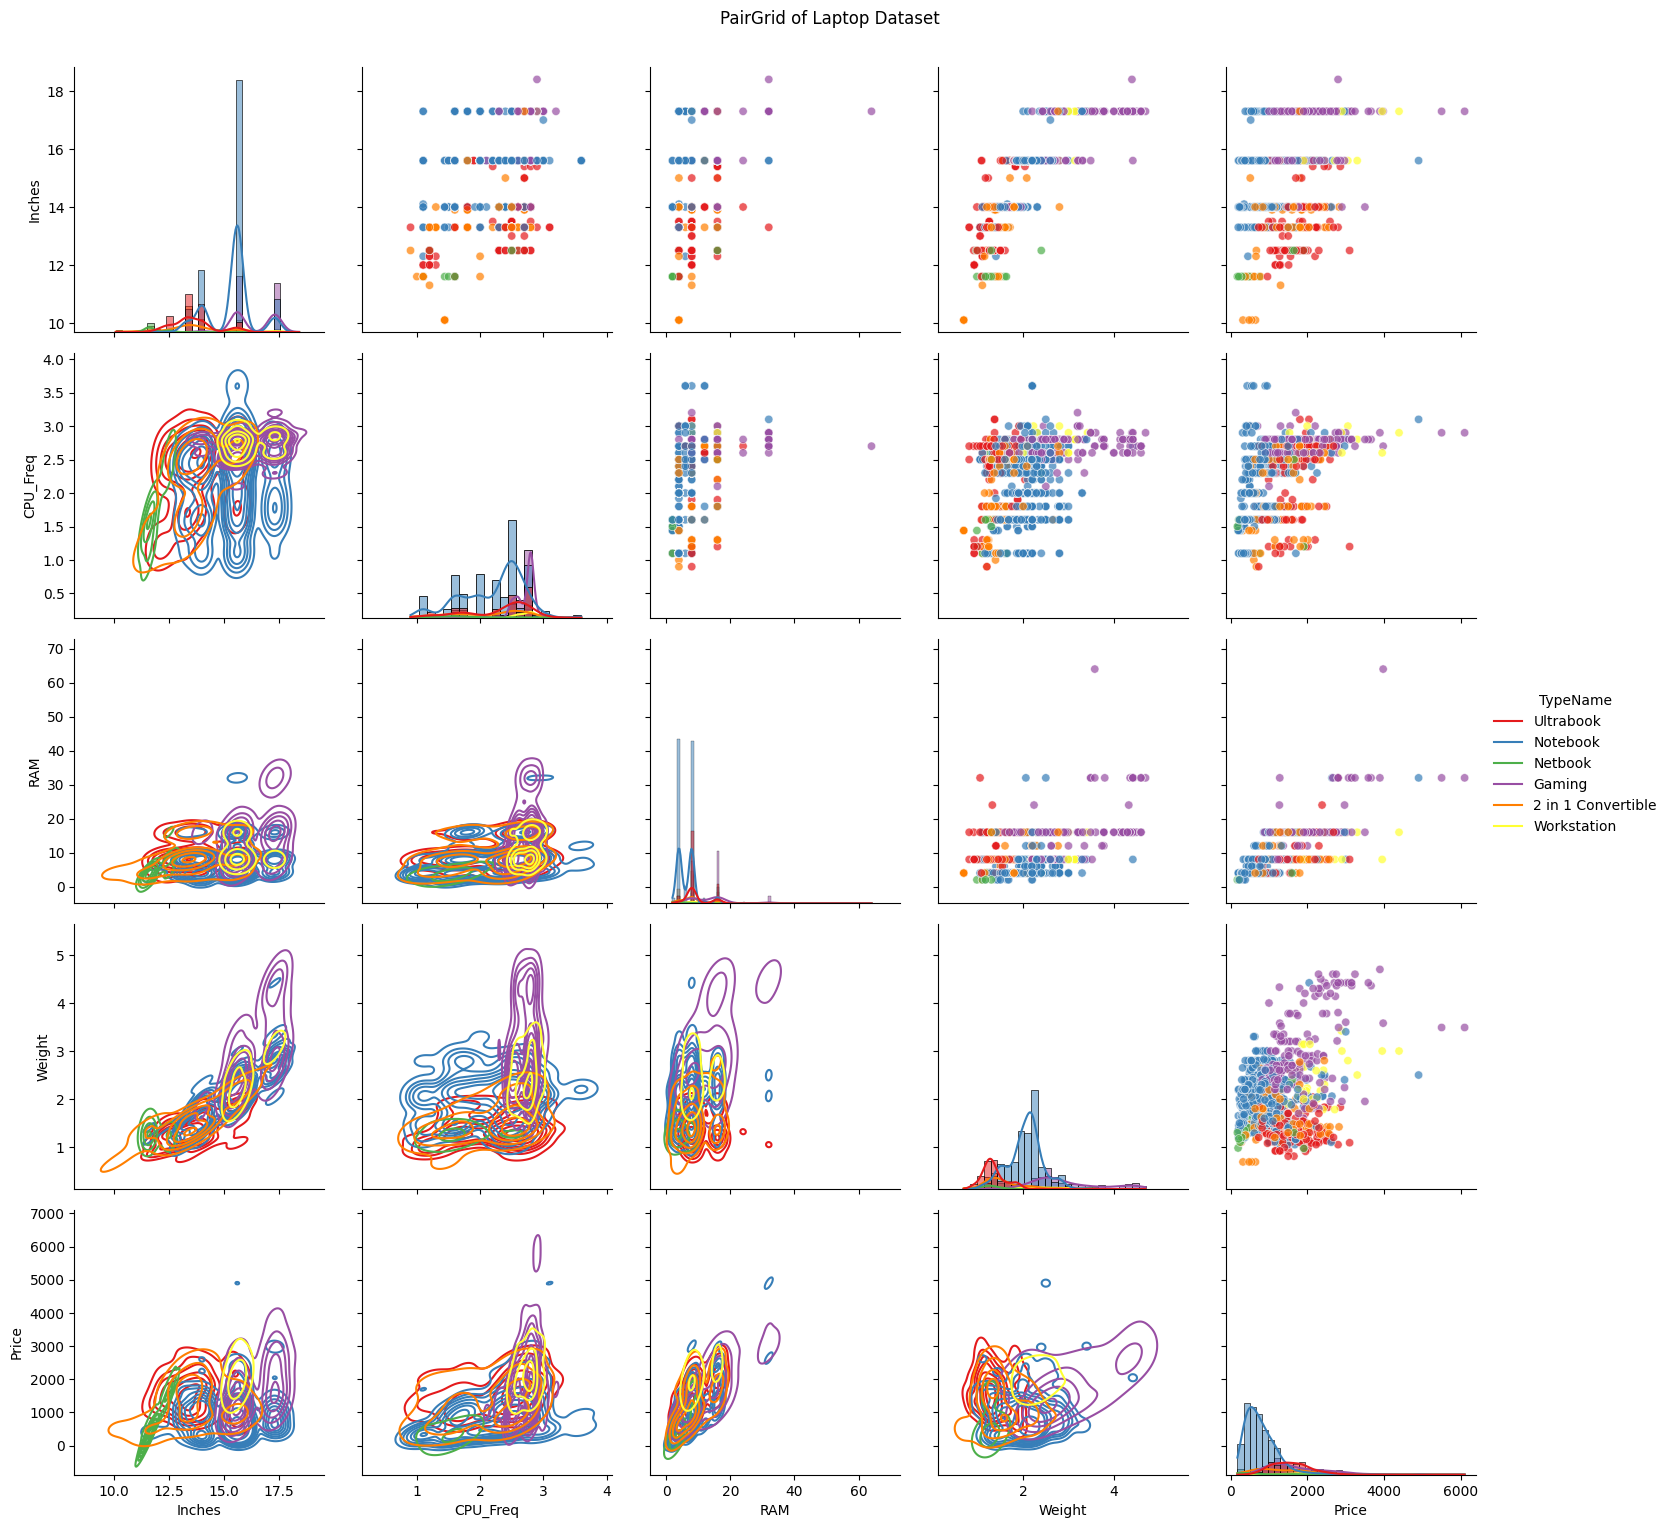

In [17]:
# PairGrid plot using PairGrid
g = sns.PairGrid(
    data=df,            # Dataset to visualize
    hue="TypeName",        # Grouping variable for color 
    palette="Set1",       # Color palette for different hue levels
    height=3,             # Height of each facet in inches
    aspect=1              # Aspect ratio of each facet (width/height)
)

# Map different plot types to different parts of the grid
g.map_upper(sns.scatterplot, alpha=0.7)   # Upper triangle: scatter plots
g.map_lower(sns.kdeplot, cmap="Blues_d")  # Lower triangle: KDE plots
g.map_diag(sns.histplot, kde=True)        # Diagonal: histograms with KDE

# Add a legend
g.add_legend()

plt.suptitle("PairGrid of Laptop Dataset", y=1.02, fontweight=15)
plt.show()


### 1.2 Price by Company
- Objective: Compare average prices across different manufacturers.
- Analysis: Group the dataset by company and calculate the average price for each.


In [18]:
sort_co = df.groupby(['Company'], as_index=False)['Price'].sum().sort_values(by='Price', ascending=False)
sort_co.head(5)

,Company,Price
4,Dell,348974.51
10,Lenovo,316126.18
7,HP,289524.33
2,Asus,170822.12
11,MSI,93361.04


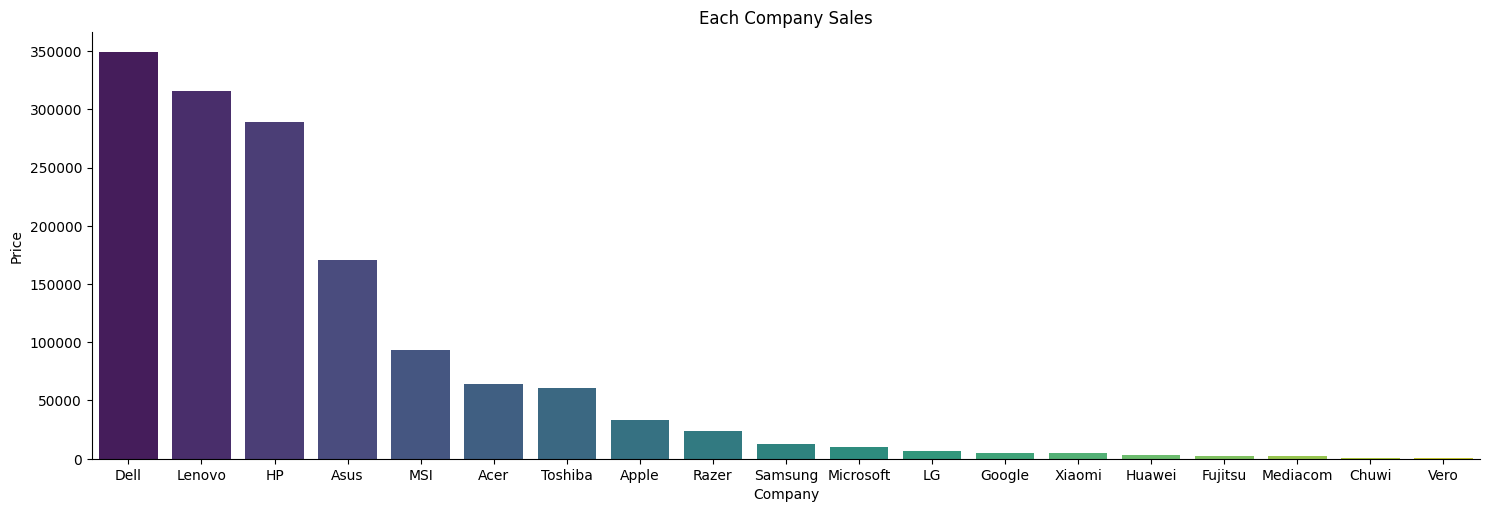

In [19]:
sns.catplot(
    data=sort_co,
    kind='bar',
    x='Company',
    y='Price',
    aspect=3,
    palette='viridis'
)

plt.title('Each Company Sales')
plt.show()


### 1.3 Price by Operating System
- Objective: Assess the impact of different operating systems on pricing.
- Compare the prices of laptops across various operating systems (e.g., Windows, Linux).



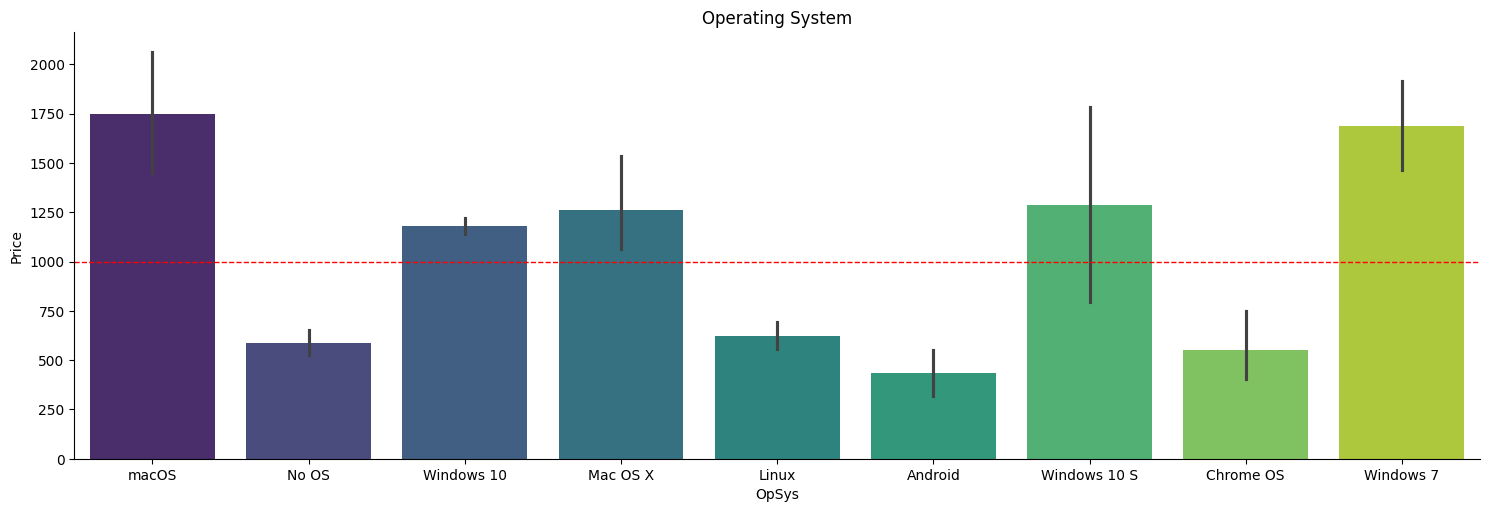

In [20]:
sns.catplot(
    data=df,
    kind='bar',
    x=df['OpSys'],
    y=df['Price'],
    aspect=3,
    palette='viridis'
)

plt.title('Operating System')
plt.axhline(y=1000, color='red', linestyle='--', linewidth=1)
plt.show()

<div class="alert alert-block alert-info">
<b>Insights : </b>

**1. Laptop Types and CPU Statistics**

- 1.1 The most popular types of laptops in terms of sales are Workstation, Gaming, and Ultra notebooks. Among the top-selling CPUs are the Core i7 7700HQ, Core i7 7500U, and Core i5 7200U. Gaming laptops are noted for their high-end features.

- 1.2 The leading brands in the market are Dell, Lenovo, HP, and Asus.

- 1.3 The most common operating systems in use are Mac OS, Mac OS X, Windows 7, and Windows 10.
</div>

---

## 2. Performance vs. Price Analysis

### 2.1 Price vs. CPU/GPU Performance
- Objective: Determine how performance affects price.
- Perform a comparative analysis between CPU/GPU performance and laptop price.


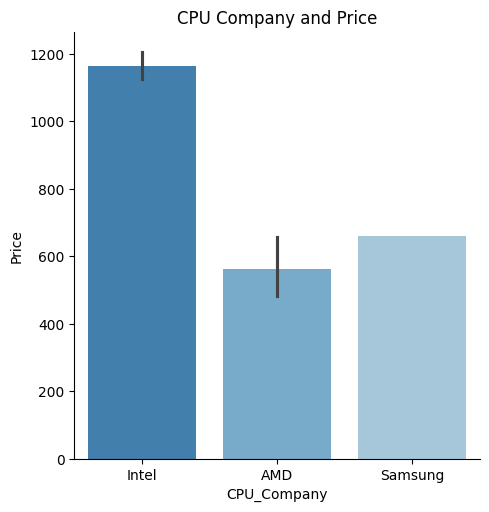

In [21]:
# cpu company
g = sns.catplot(
    data=df,
    kind='bar',
    x=df['CPU_Company'],
    y=df['Price'],
    palette='tab20c'
)

plt.title('CPU Company and Price')
plt.show()

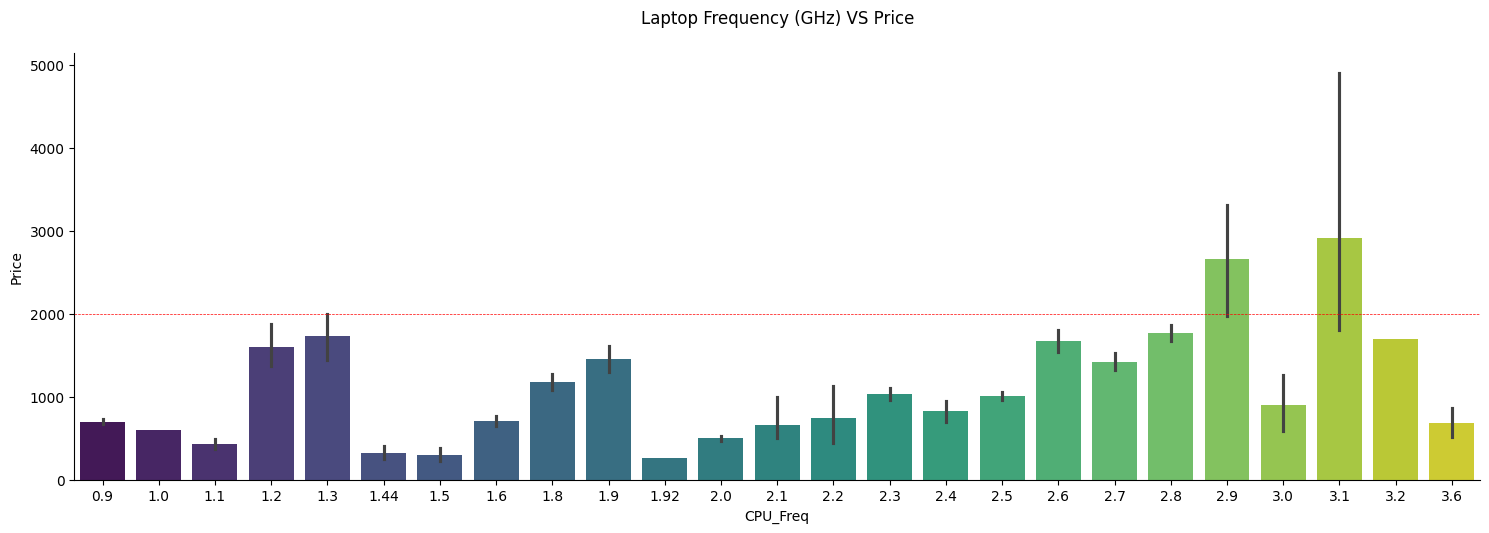

In [22]:
# laptop freq

sns.catplot(
    data=df,
    kind='bar',
    x=df['CPU_Freq'],
    y=df['Price'],
    palette='viridis',
    aspect=3
    
)

plt.title('Laptop Frequency (GHz) VS Price', y=1.05)
plt.axhline(y=2000, color='red', linestyle='--', linewidth=0.5) 
plt.show()

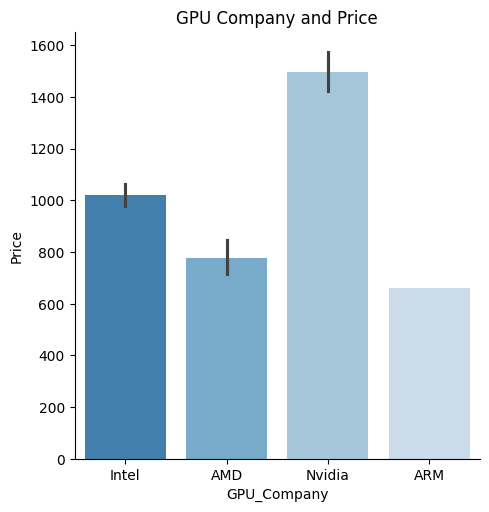

In [23]:
# gpu company 

g = sns.catplot(
    data=df,
    kind='bar',
    x=df['GPU_Company'],
    y=df['Price'],
    palette='tab20c'
)

plt.title('GPU Company and Price')
plt.show()

In [24]:
# df gpu 
df_gpu = df.groupby(['GPU_Type'], as_index=False)['Price'].sum() \
    .sort_values(by='Price', ascending=True).reset_index(drop=True)
    
df_gpu

,GPU_Type,Price
0,Radeon R3,379.00
1,R4 Graphics,399.00
2,Radeon R7,429.00
3,Radeon R5 430,499.00
4,GeForce 920,519.00
...,...,...
101,GeForce GTX 1050,79478.84
102,UHD Graphics 620,81992.24
103,GeForce GTX 1060,87201.51
104,HD Graphics 520,190164.77


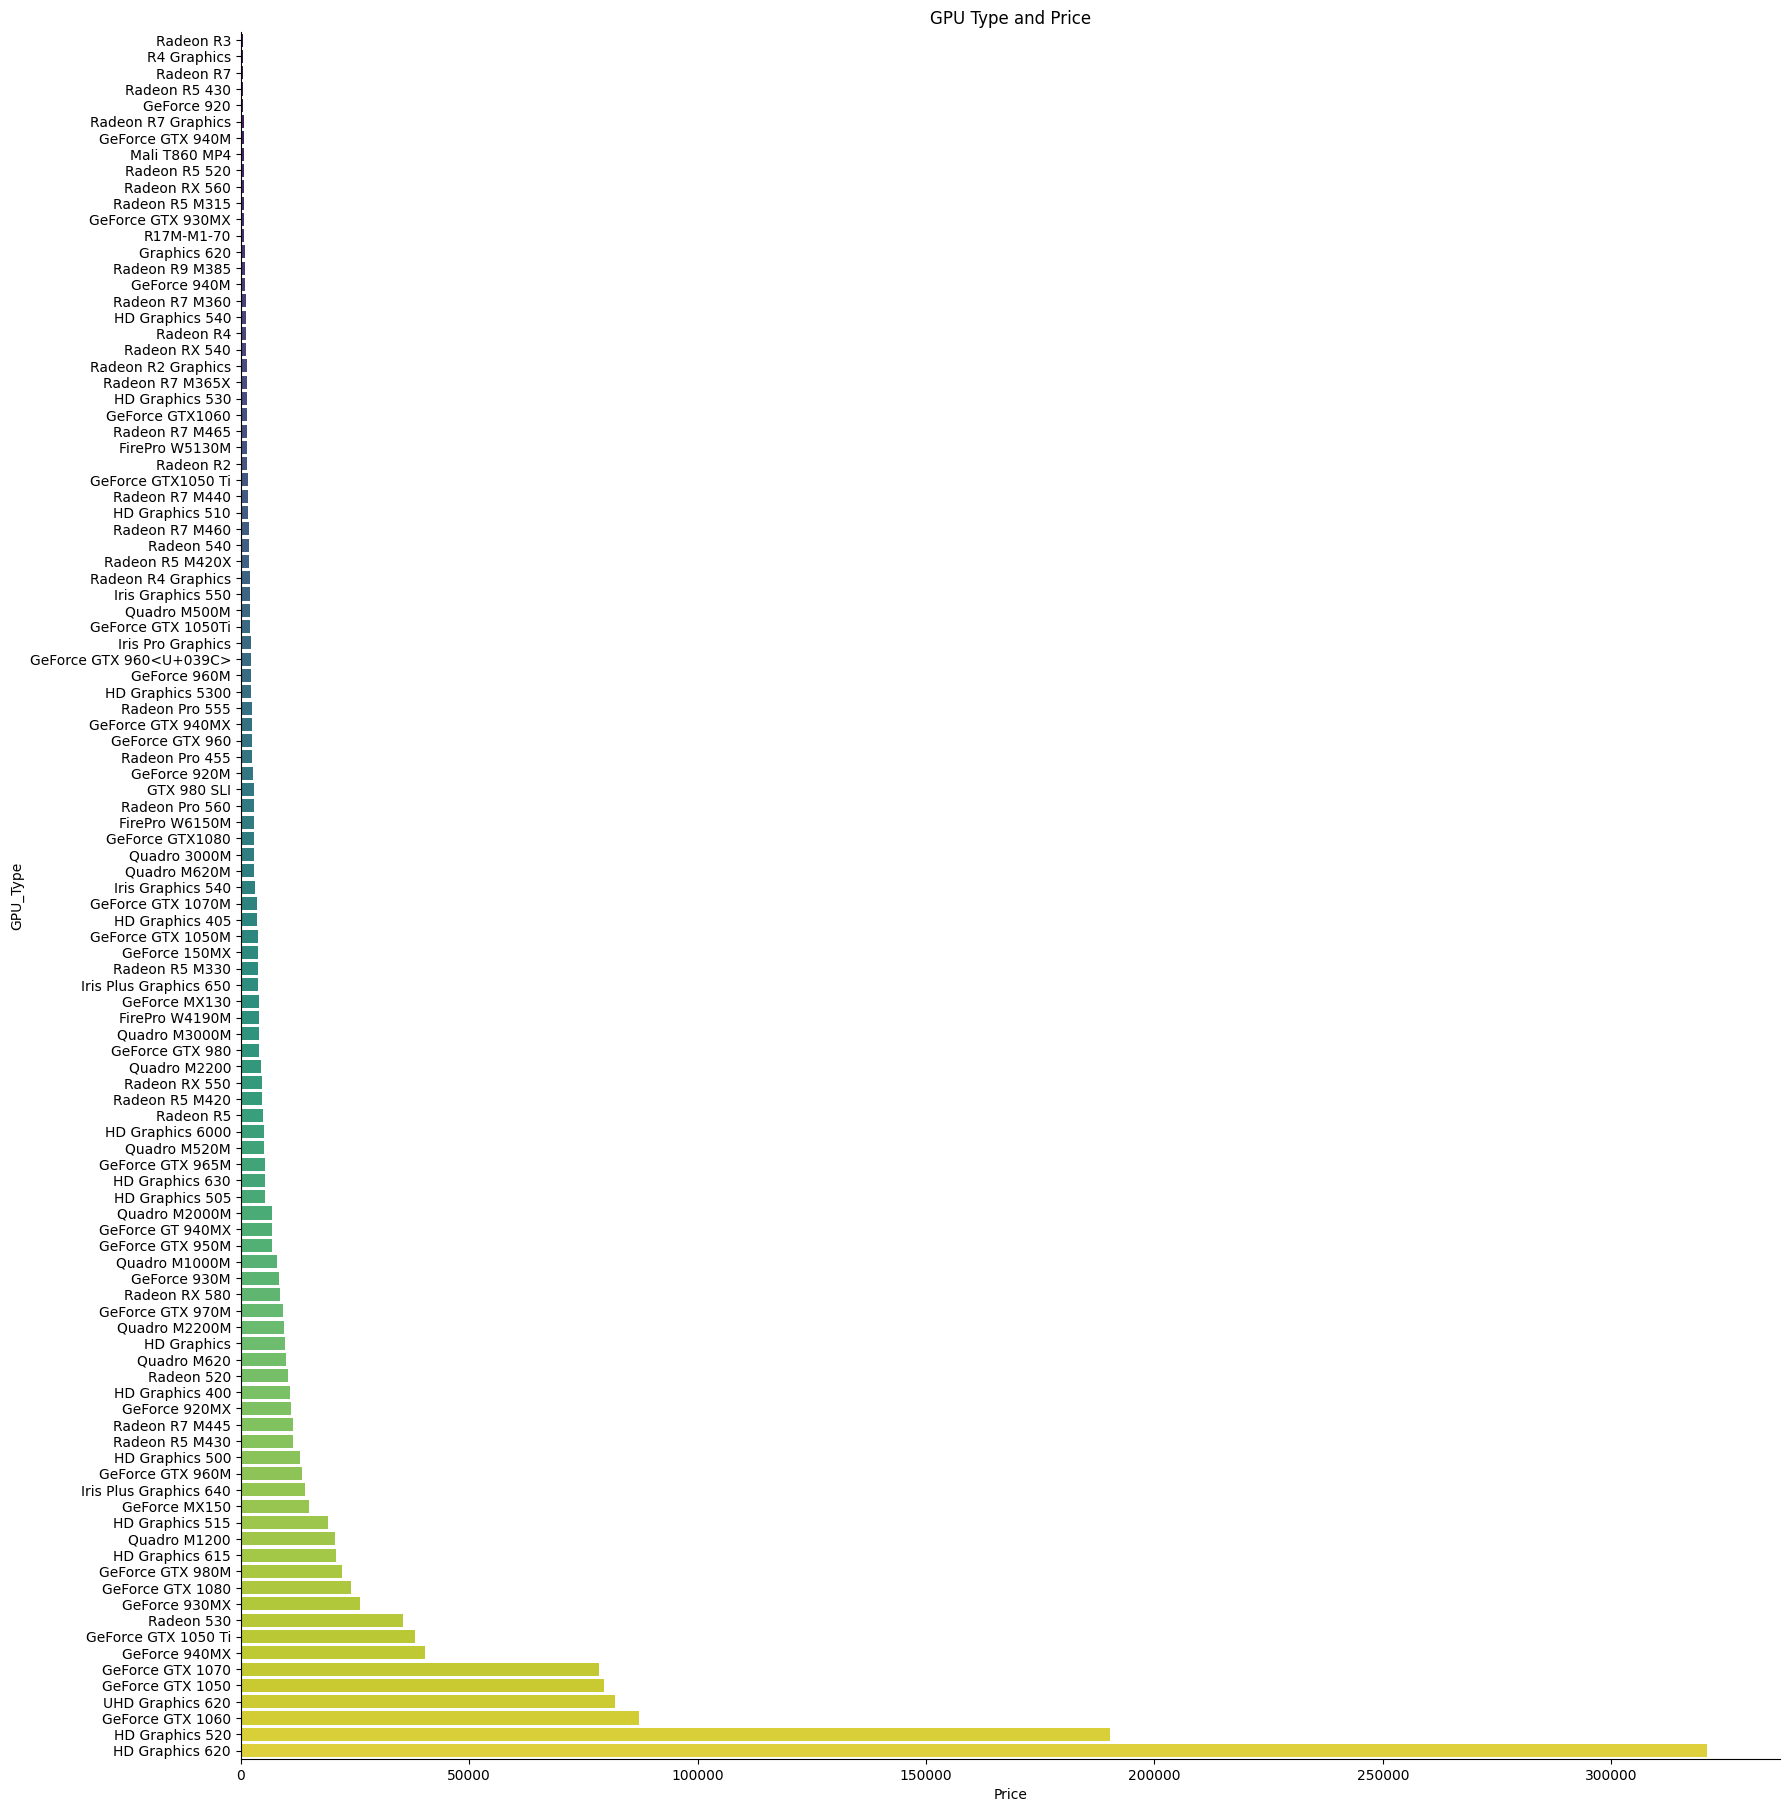

In [25]:
# gpu type

g = sns.catplot(
    data=df_gpu,
    kind='bar',
    y=df_gpu['GPU_Type'],
    x=df_gpu['Price'],
    palette='viridis', 
    height=18,
)

plt.title('GPU Type and Price')
plt.show()


### 2.2 Price vs. Memory
- Objective: Analyze how storage type and capacity impact price.
- Compare HDD vs. SSD storage prices and capacities.


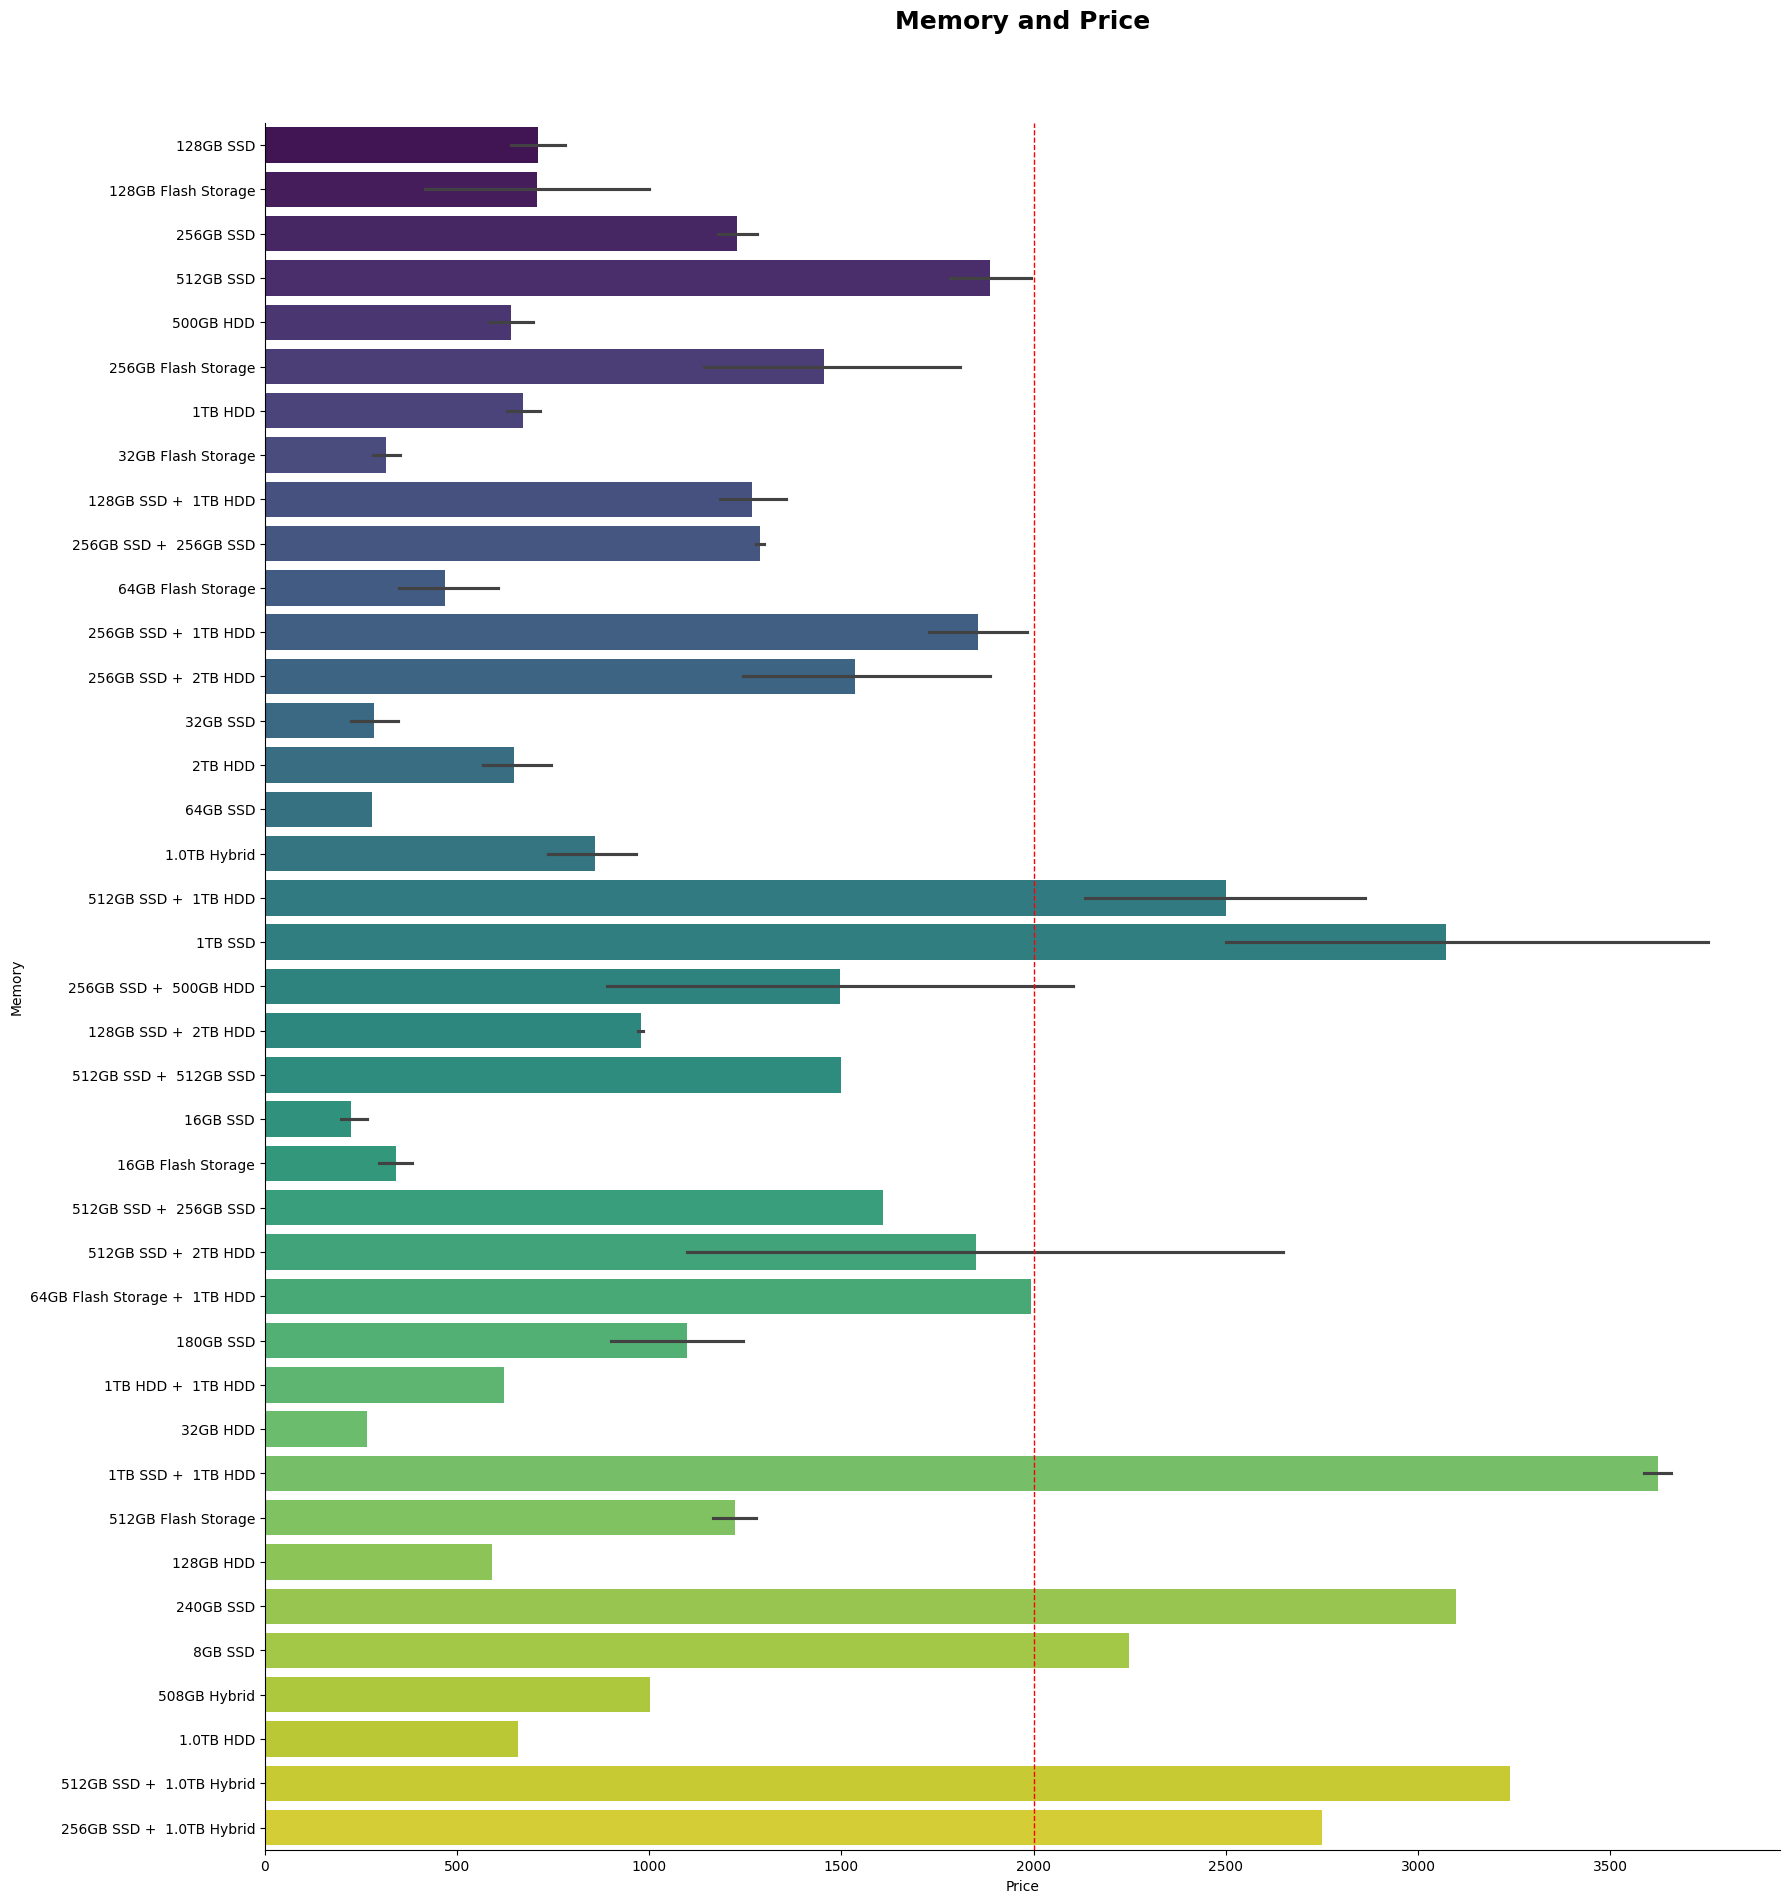

In [26]:
# Memory and price

g = sns.catplot(
    data=df,
    kind='bar',
    y=df['Memory'],
    x=df['Price'],
    palette='viridis',
    height=18,
)

plt.title('Memory and Price', y=1.05, fontweight='bold', fontsize=18)
plt.axvline(x=2000, linewidth=1, linestyle='--', color='red')
plt.show()

In [27]:
# categorize the memory type
def categorize_memory(memory):
    if 'HDD' in memory and 'SSD' in memory:
        return 'Hybrid'
    elif 'HDD' in memory:
        return 'HDD'
    elif 'SSD'in memory:
        return 'SSD'
    elif 'Flash' in memory:
        return 'Flash'
    else:
        'Other'
        
        
df['Memory_Type']  = df['Memory'].apply(categorize_memory)
df[['Memory_Type', 'Memory']]

,Memory_Type,Memory
0,SSD,128GB SSD
1,Flash,128GB Flash Storage
2,SSD,256GB SSD
3,SSD,512GB SSD
4,SSD,256GB SSD
...,...,...
1270,SSD,128GB SSD
1271,SSD,512GB SSD
1272,Flash,64GB Flash Storage
1273,HDD,1TB HDD


In [28]:
# Count the different types of memory
count_hdd = df['Memory_Type'].str.count('HDD').sum()
count_ssd = df['Memory_Type'].str.count('SSD').sum()
count_flash = df['Memory_Type'].str.count('Flash').sum()
count_Hybrid = df['Memory_Type'].str.count('Hybrid').sum()

print(f"HDD count: {count_hdd}")
print(f"SSD count: {count_ssd}")
print(f"Flash Storage count: {count_flash}")
print(f'Hybrid count :{count_Hybrid}')


HDD count: 360.0
SSD count: 637.0
Flash Storage count: 70.0
Hybrid count :200.0


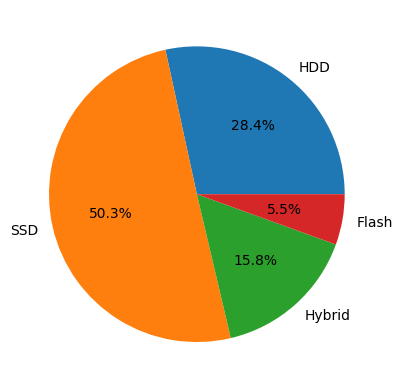

In [29]:
# memory type pie chat 
labels = ['HDD', 'SSD', 'Hybrid', 'Flash']
sizes = [count_hdd, count_ssd, count_Hybrid, count_flash]

plt.pie(
    sizes,
    labels=labels,
    autopct= '%1.1f%%',
)
plt.show()

<div class="alert alert-block alert-info">
<b>Info : </b>

**2. CPU and GPU Insights**

- 2.1 Intel CPUs are generally the most expensive, while AMD and Samsung CPUs are priced similarly. Most laptops operate at frequencies around 3.1 GHz to 2.9 GHz. Nvidia is the most renowned GPU brand, followed by Intel. The HD Graphics 620 is the most popular graphics card, with sales amounting to €320,869.

- 2.2 The most common memory configurations are 512GB SSD + 1TB HDD, 1TB SSD, 512GB SSD + 1TB Hybrid, and 256GB SSD + 1TB Hybrid. Of these, the 1TB SSD + 1TB HDD configuration is the most popular. Approximately 50.3% of users prefer SSD memory.
</div>


---

## 3. Customer Segment Identification




### 3.1 Market Segmentation by Laptop Type
- Objective: Group laptops into categories based on size, weight, and performance.
- Create segments for different user categories like budget, professional, gaming, and ultraportable models.


In [30]:
df['CPU_Freq'].unique()

array([2.3 , 1.8 , 2.5 , 2.7 , 3.1 , 3.  , 2.2 , 1.6 , 2.  , 2.8 , 1.2 ,
       2.9 , 2.4 , 1.44, 1.5 , 1.9 , 1.1 , 1.3 , 2.6 , 3.6 , 3.2 , 1.  ,
       2.1 , 0.9 , 1.92])

In [31]:
df['RAM'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

In [32]:
df['Price'].unique()

array([1339.69,  898.94,  575.  , 2537.45, 1803.6 ,  400.  , 2139.97,
       1158.7 , 1495.  ,  770.  ,  393.9 ,  344.99, 2439.97,  498.9 ,
       1262.4 , 1518.55,  745.  , 2858.  ,  499.  ,  979.  ,  191.9 ,
        999.  ,  258.  ,  819.  ,  659.  ,  418.64, 1099.  ,  800.  ,
       1298.  ,  896.  ,  244.99,  199.  ,  439.  , 1869.  ,  998.  ,
        249.  ,  367.  ,  488.69,  879.  ,  389.  , 1499.  ,  522.99,
        682.  , 1419.  ,  369.  , 1299.  ,  639.  ,  466.  ,  319.  ,
        841.  ,  398.49, 1103.  ,  384.  ,  767.8 ,  586.19, 2449.  ,
        415.  ,  599.  ,  941.  ,  690.  , 1983.  ,  438.69,  229.  ,
        549.  ,  949.  , 1089.  ,  955.  ,  870.  , 1095.  ,  519.  ,
        855.  ,  530.  ,  977.  , 1096.16, 1510.  ,  860.  ,  399.  ,
        395.  , 1349.  ,  699.  ,  598.99, 1449.  , 1649.  ,  689.  ,
       1197.  , 1195.  , 1049.  ,  847.  ,  599.9 ,  485.  ,  577.  ,
       1249.  ,  719.  ,  349.  ,  647.  , 1119.  , 1340.  ,  414.9 ,
       1193.  , 1480

In [33]:
df['Weight'].unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

In [34]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [35]:
df[['CPU_Freq', 'RAM', 'Weight', 'Price']]

,CPU_Freq,RAM,Weight,Price
0,2.3,8,1.37,1339.69
1,1.8,8,1.34,898.94
2,2.5,8,1.86,575.00
3,2.7,16,1.83,2537.45
4,3.1,8,1.37,1803.60
...,...,...,...,...
1270,2.5,4,1.80,638.00
1271,2.5,16,1.30,1499.00
1272,1.6,2,1.50,229.00
1273,2.5,6,2.19,764.00


In [36]:
df.describe()

,Inches,CPU_Freq,RAM,Weight,Price
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


we can create a customer segmentation using the quartiles (`25%`, `50%`, `75%`) and relevant thresholds for the `CPU_Freq`, `RAM`, `Weight`, and `Price` values.

We will classify the laptops into the following segments:
1. **Budget**: Devices with moderate specs and lower prices.
2. **Ultraportable**: Lightweight and low-cost devices with lower specs.
3. **Professional**: Higher specs and mid-tier price range.
4. **Gaming**: High-end devices with high performance and price.

Let's base the conditions for the segmentation on the quartile thresholds.

### Define the Segmentation Logic:
- **Budget**:
  - `CPU_Freq`: Between `2.0 GHz` and `2.5 GHz`
  - `RAM`: Between `4 GB` and `6 GB`
  - `Weight`: Between `1.5 kg` and `2.04 kg`
  - `Price`: Between `609 EUR` and `989 EUR`

- **Ultraportable**:
  - `CPU_Freq`: Less than and equal to `2.0 GHz`
  - `RAM`: Less than and equal to `4 GB`
  - `Weight`: Less than and equal to `1.5 kg`
  - `Price`: Less than and equal to `609 EUR`

- **Professional**:
  - `CPU_Freq`: Between `2.5 GHz` and `2.7 GHz`
  - `RAM`: Between `6 GB` and `8 GB`
  - `Weight`: Between `2.04 kg` and `2.31 kg`
  - `Price`: Between `989 EUR` and `1496.5 EUR`

- **Gaming**:
  - `CPU_Freq`: Greater than `2.7 GHz`
  - `RAM`: Greater than `8 GB`
  - `Weight`: Greater than `2.31 kg`
  - `Price`: Greater than `1496.5 EUR`


In [37]:
# Define the customer segmentation logic
def customer_segment(cpu, ram, weight, price):
    # Budget segment
    if 2.0 <= cpu <= 2.5 or 4 <= ram <= 6 or 1.5 <= weight <= 2.04 and 609 <= price <= 989:
        return 'Budget'
    # Ultraportable segment
    elif cpu < 2.0 or ram < 4 or weight < 1.5 and price < 609:
        return 'Ultraportable'
    # Professional segment
    elif 2.5 <= cpu <= 2.7 or 6 <= ram <= 8 or 2.04 <= weight <= 2.31 and 989 <= price <= 1496.5:
        return 'Professional'
    # Gaming segment
    elif cpu > 2.7 or ram > 8 or weight > 2.31 and price > 1496.5:
        return 'Gaming'
    # If no conditions match, return 'Other'
    else:
        return 'Other'


In [38]:

# Apply the customer segment function to the DataFrame
df['Customer_Segment'] = df.apply(lambda row: customer_segment(row['CPU_Freq'], row['RAM'], row['Weight'], row['Price']), axis=1)

# Display the updated DataFrame with the Customer_Segment column
df[['CPU_Freq', 'RAM', 'Weight', 'Price', 'Customer_Segment']].sample(6)


,CPU_Freq,RAM,Weight,Price,Customer_Segment
313,2.2,8,2.23,469.00,Budget
1246,2.5,4,1.60,875.00,Budget
847,2.3,8,1.45,1026.00,Budget
692,2.8,8,3.14,1907.99,Professional
105,2.5,6,1.58,659.00,Budget
1055,2.3,4,2.31,705.15,Budget


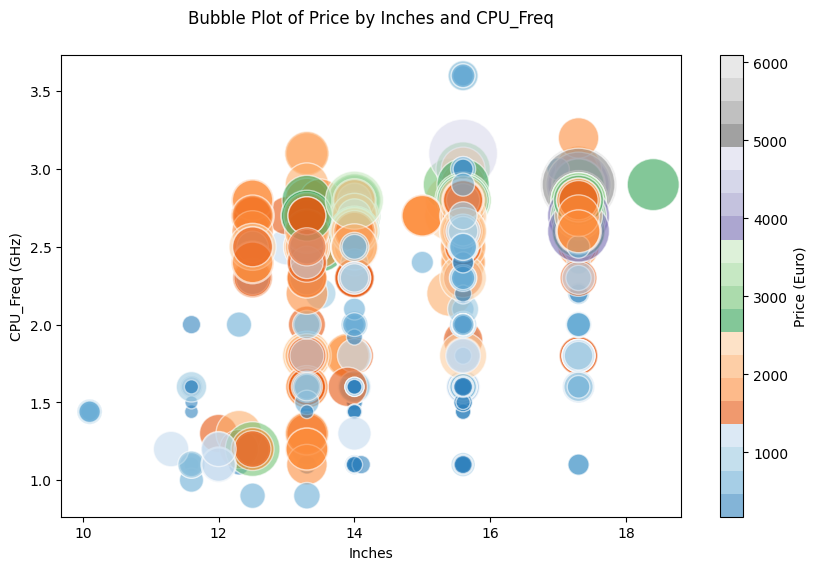

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['Inches'], 
    df['CPU_Freq'], 
    s=df['Price']/2, 
    c=df['Price'], 
    cmap='tab20c', 
    alpha=0.6, 
    edgecolor="w")

# Add labels and color bar
plt.colorbar(label='Price (Euro)')
plt.xlabel('Inches')
plt.ylabel('CPU_Freq (GHz)')
plt.title('Bubble Plot of Price by Inches and CPU_Freq', y=1.05)
plt.show()


<div class="alert alert-block alert-info">
<b>Insights : </b>

**3. Laptop Specifications**

- 3.1 Most laptop sales are concentrated in models with screen sizes between 15 to 16 inches and CPU frequencies ranging from 2.0 to 3.0 GHz, with prices ranging from €1000 to €2000. Laptops with screen sizes between 17 to 18 inches and CPU frequencies between 2.5 to 3.0 GHz fall within the same price range.

</div>


---

## 4. Competitive Analysis

### 4.1 Price and Feature Comparison
- Objective: Compare the company's pricing strategy against competitors.
- Analyze key laptop features across different manufacturers to assess competitiveness.


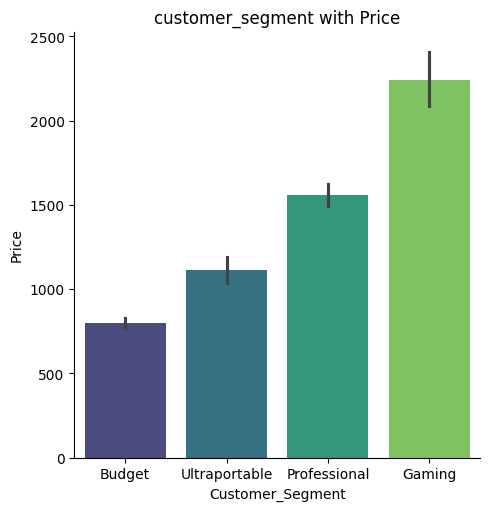

In [49]:
# customer segment with price

sns.catplot(
    data=df,
    kind='bar',
    x=df['Customer_Segment'],
    y=df['Price'],
    palette='viridis',
)

plt.title('customer_segment with Price')
plt.show()


### 4.2 Feature Penetration
- Objective: Identify common features offered by competitors.
- Perform a frequency analysis of features like SSD storage, screen resolution, etc.


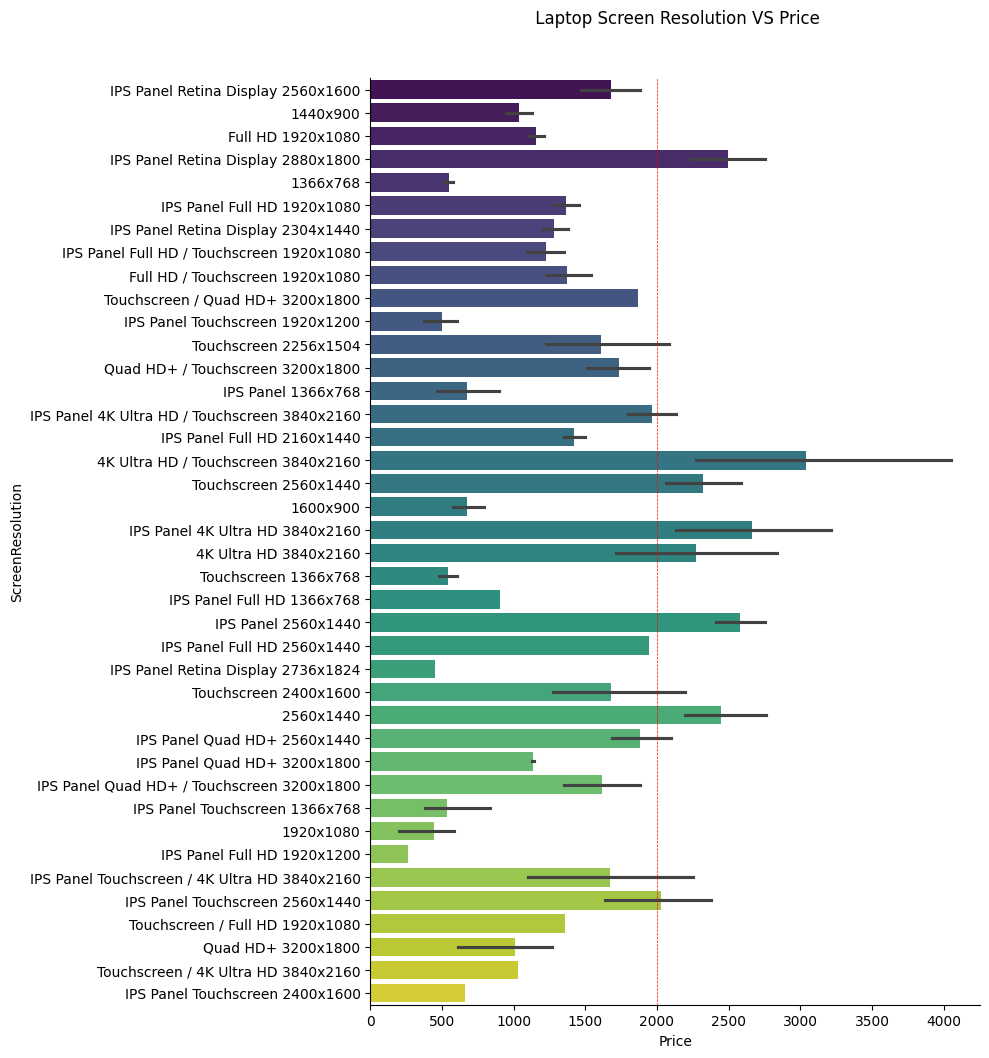

In [50]:
# screen resolution
sns.catplot(
    data=df,
    kind='bar',
    y=df['ScreenResolution'],
    x=df['Price'],
    palette='viridis',
    height=10
    
)

plt.title(' Laptop Screen Resolution VS Price', y=1.05)
plt.axvline(x=2000, color='red', linestyle='--', linewidth=0.5) 
plt.show()

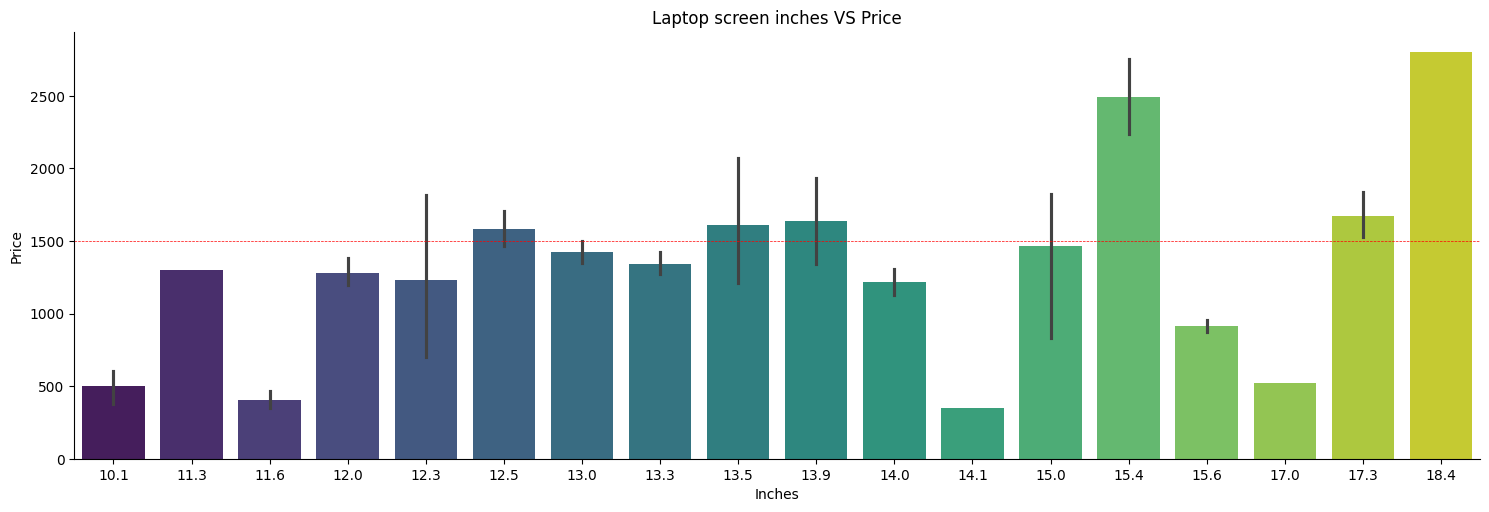

In [51]:
# screen inches
sns.catplot(
    data=df,
    kind='bar',
    x=df['Inches'],
    y=df['Price'],
    aspect=3,
    palette='viridis'
    
)

plt.title('Laptop screen inches VS Price')
plt.axhline(y=1500, color='red', linestyle='--', linewidth=0.5) 
plt.show()

<div class="alert alert-block alert-info">
<b>Insights : </b>

**4. Gaming Laptops and Screen Resolutions**

- 4.1 Gaming laptops are typically priced between €2000 and €2500.

- 4.2 The most common screen resolutions for laptops are 4K Ultra HD (3840x2160), Retina Display (2880x1800), and Touch Screen (2560x1440). The IPS panel 4K Ultra HD (3840x2160) and Normal 2560x1440 are also frequently sold.


</div>


---

## 5. Weight vs. Portability Analysis

### 5.1 Weight vs. Features
- Objective: Understand the relationship between laptop weight and performance.
- Perform a regression analysis to evaluate how weight impacts performance and price.


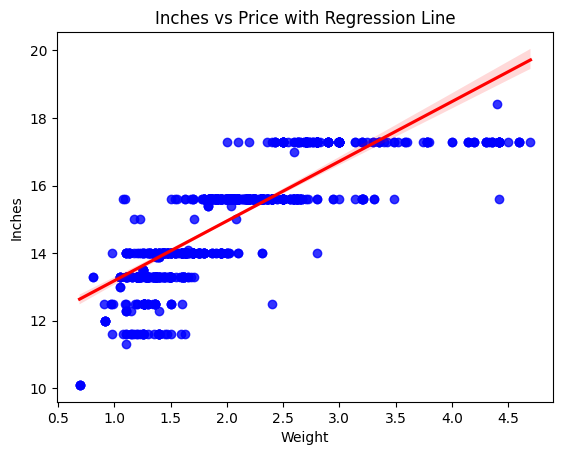

In [52]:
# inches price
sns.regplot(data=df, x='Weight', y='Inches', scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Inches vs Price with Regression Line')
plt.show()


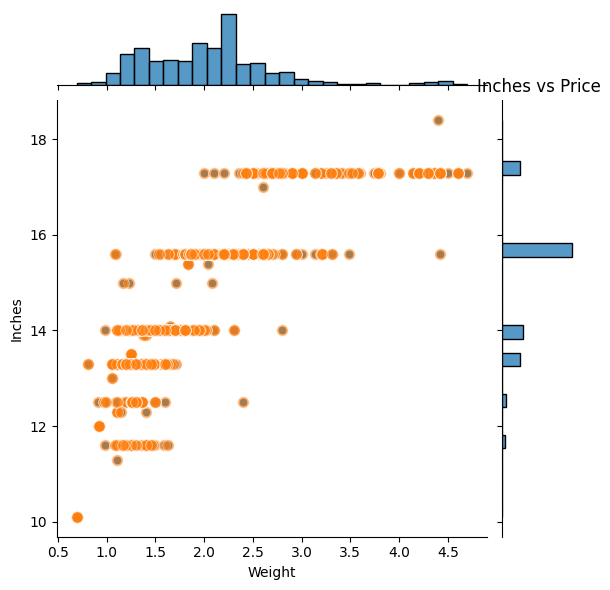

In [53]:
# joint plot with wt and inches

g = sns.JointGrid(data=df, x='Weight', y='Inches')
g = g.plot(sns.scatterplot, sns.histplot)

# Add hue for color
sns.scatterplot(
    data=df, 
    x='Weight',
    y='Inches', 
    palette='viridis', 
    ax=g.ax_joint, 
    alpha=0.6, 
    s=70
)

plt.title('Inches vs Price')
plt.show()



### 5.2 Ultrabook Market Segmentation
- Objective: Focus on ultrabooks and assess the balance between weight and performance.
- Analyze the ultrabook segment to identify key trends in lightweight, high-performance laptops.


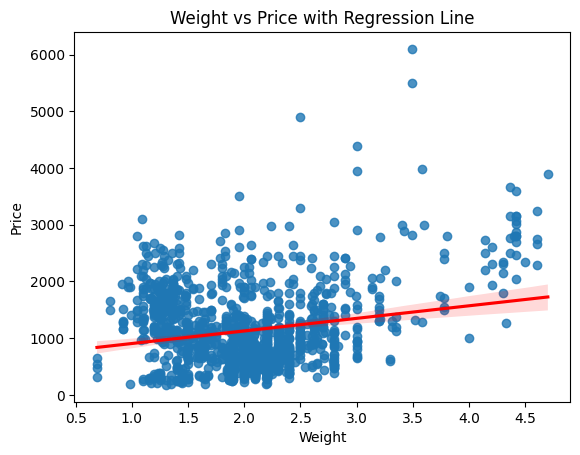

In [54]:
# wt and price

sns.regplot(data=df, x='Weight', y='Price', line_kws={"color": "red"})

plt.title('Weight vs Price with Regression Line')
plt.show()


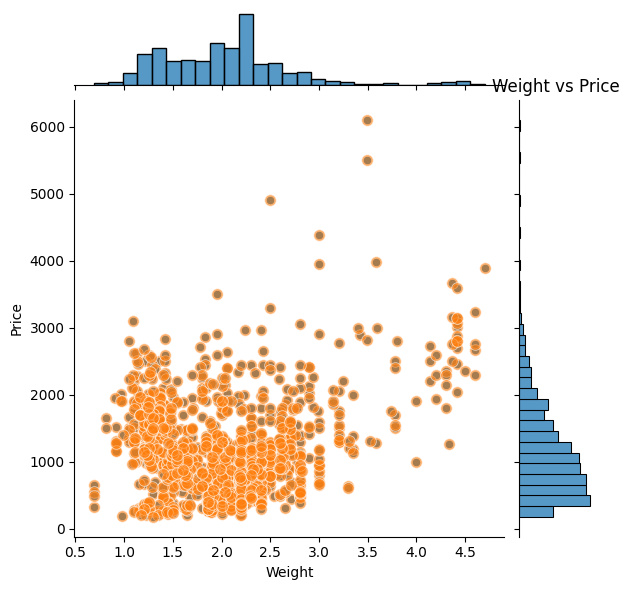

In [55]:
# wt and price joint plot
# Create the JointGrid with scatterplot
g = sns.JointGrid(data=df, x='Weight', y='Price')
g = g.plot(sns.scatterplot, sns.histplot)

# Add hue for color
sns.scatterplot(
    data=df, 
    x='Weight',
    y='Price', 
    palette='RdBu', 
    ax=g.ax_joint, 
    alpha=0.6, 
    s=70
)

plt.title('Weight vs Price')
plt.show()


<div class="alert alert-block alert-info">
<b>Insights : </b>

**Screen Resolution and Weight**

- 5.1 The most common screen sizes are 15.4 inches and 18.4 inches. Larger screen sizes correlate with increased weight, with most laptops weighing between 1.0 to 3.0 kg.

</div>


---

## 6. Operating System Analysis

### 6.1 Price by Operating System
- Objective: Assess the impact of different operating systems on pricing.
- Compare the prices of laptops across various operating systems like Windows, Linux, etc.


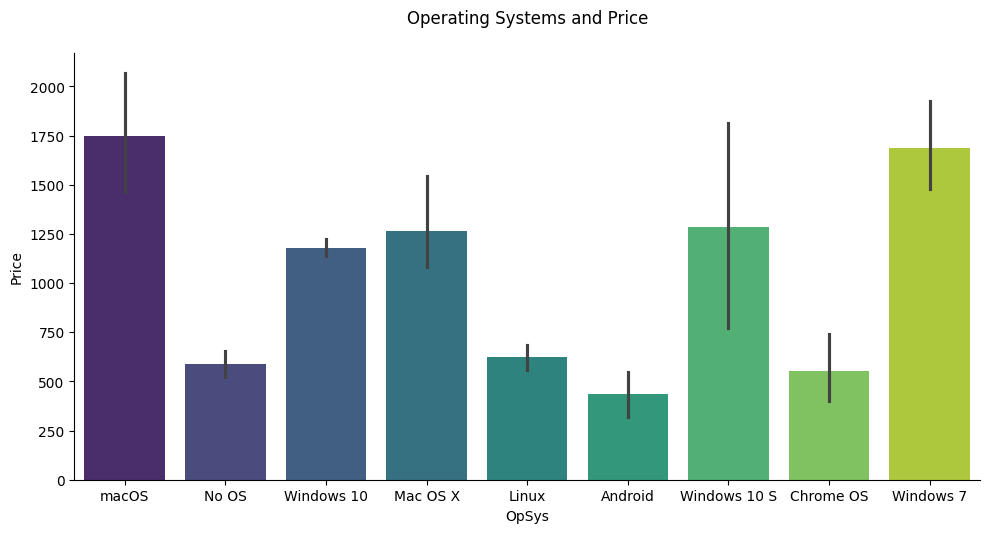

In [56]:
# operating system

sns.catplot(
    data=df,
    kind='bar',
    x=df['OpSys'],
    y=df['Price'],
    palette='viridis',
    aspect=2,
    
)

plt.title('Operating Systems and Price', y=1.05)
plt.show()

<div class="alert alert-block alert-info">
<b>Insights : </b>

**6. Operating System Usage**

- 6.1 Windows 7 and Mac OS are the most widely used operating systems.
</div>


---

## 7. Correlation Analysis

### 7.1 Correlation Matrix
- Objective: Identify relationships between different features and pricing.
- Create a correlation matrix to determine which features are most strongly associated with price.


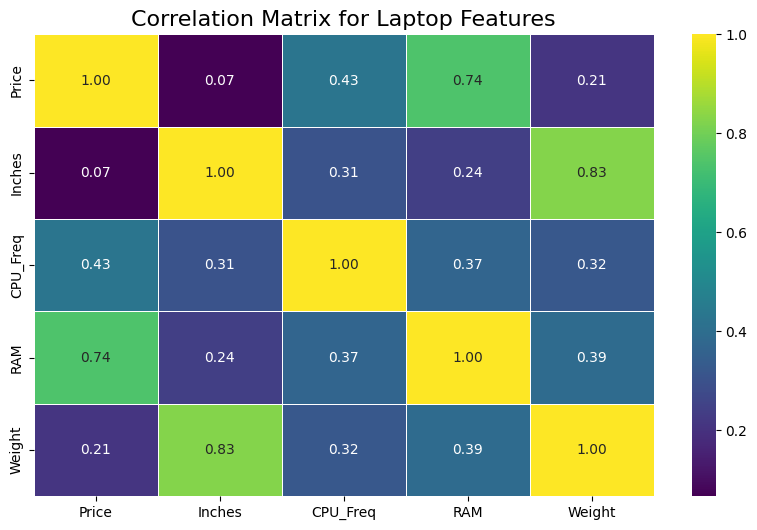

In [57]:
# correlation 

# Select numerical columns for correlation analysis
numerical_columns = ['Price', 'Inches', 'CPU_Freq', 'RAM', 'Weight']

# Create a correlation matrix using Pearson correlation
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Set title and labels
plt.title('Correlation Matrix for Laptop Features', fontsize=16)
plt.show()


<div class="alert alert-block alert-info">
<b>Insights : </b>

**6. General Observations**

- 6.1 All observed factors show a positive correlation.


</div>

# Conclusion

<div class="alert alert-block alert-info">

**Conclusion**

The analysis reveals key trends in the laptop market, highlighting the popularity of gaming and ultra notebooks, the prominence of Intel CPUs, and the preference for SSD memory among users. Dell, Lenovo, HP, and Asus are leading brands, while screen size and resolution preferences vary, with larger screens generally leading to heavier laptops. The most common operating systems are Windows 7 and Mac OS. Overall, there is a strong positive correlation among various factors affecting laptop sales and features, suggesting a consistent pattern in consumer preferences and market trends.
</div>